In [41]:
import os
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm import tqdm
# from extract_features import GenerateFeatures
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GroupKFold, GroupShuffleSplit
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE





In [42]:
features = pd.read_csv('/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/feature_datasets/subject_based_norm/feature_set_4/three_class_raw_2s_no.csv')
# features.drop(['center_time', 'start_time', 'end_time'], axis= 1, inplace=True)
features.drop(['center_time'], axis= 1, inplace=True)
features


,acc_x_mean,acc_x_std,acc_x_energy,acc_x_jerk,acc_x_autocorr_peak,acc_x_autocorr_lag,acc_x_sample_entropy,acc_x_dominant_frequency,acc_x_spectral_centroid,acc_x_spectral_spread,...,gyr_mag_high_band_power,acc_xy_corr,acc_xz_corr,acc_yz_corr,acc_gyr_corr,tilt_var,acc_magnitude_mean,gyr_magnitude_mean,label,experiment_id
0,1.027208,1.005637,2.066463,24.702545,0.922460,0.016935,0.758286,5.504482,4.866430,2.475387,...,0.433022,0.113884,-0.069472,0.617961,0.241386,0.161761,1.646409,2.552632,pre-void,1
1,0.762864,0.273525,0.656778,9.516582,0.962838,0.016935,1.414307,7.005705,7.133455,4.053642,...,0.031394,-0.167799,0.012058,0.459326,0.009044,0.032951,1.119071,0.683197,pre-void,1
2,0.381709,0.479763,0.375875,12.122137,0.833639,0.016935,1.396447,0.500407,4.853211,5.043329,...,0.051982,-0.058582,-0.204570,0.700326,-0.094720,0.080964,1.800085,1.421490,pre-void,1
3,0.842092,0.846989,1.426509,22.014882,0.888897,0.016935,1.076139,6.004890,4.992569,3.188824,...,0.251759,-0.065512,0.036206,0.701680,0.160792,0.158051,1.529054,1.713838,pre-void,1
4,0.565058,0.443517,0.515997,14.184323,0.899162,0.016935,1.402126,7.005705,6.824539,3.735350,...,0.154371,-0.068425,0.226174,0.651821,0.276912,0.377185,1.383269,1.847173,pre-void,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,0.185532,0.356244,0.161332,4.772224,0.930323,0.016543,0.625895,0.499565,2.141629,3.473658,...,0.113644,-0.348660,-0.511067,0.916241,-0.044309,0.159638,0.497629,2.392817,post-void,41
1185,0.818064,0.115337,0.682532,3.628671,0.989482,0.016543,1.475907,0.999129,6.623307,6.071664,...,0.052257,0.208354,0.219626,0.886649,-0.180890,0.021958,0.866123,1.005636,post-void,41
1186,-0.145536,0.414586,0.193062,3.534657,0.962356,0.016543,0.462191,0.499565,1.249254,2.810886,...,0.068363,-0.461865,-0.650086,0.828341,-0.642996,0.070416,0.526177,1.360635,post-void,41
1187,-0.516767,0.106257,0.278338,2.970260,0.982923,0.016543,1.072637,0.499565,9.365089,6.508078,...,0.067176,0.358593,0.486637,0.919841,0.102501,0.015038,0.792564,0.798071,post-void,41


View label distribution

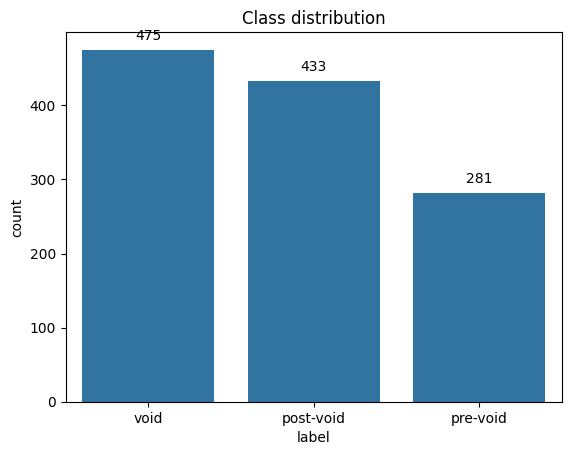

In [43]:
plt.figure()
ax = sns.countplot(x='label',
                   data=features,
                   order=features.label.value_counts().index)

# Manually add value labels
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 10,
            f'{int(height)}',
            ha='center', va='bottom')

plt.title('Class distribution')
plt.show()

In [44]:
X = features.drop(columns=['label', 'experiment_id'])
y = features['label']

In [45]:
# feature_names = X.columns

In [46]:
# X = scale(X)
# X

In [47]:
# Should be close to 0 and 1 respectively
# print("Mean:", X.mean(axis=0))
# print("Std:", X.std(axis=0))

#### Perform PCA analysis

In [48]:
# pca = PCA(n_components=80)
# pca.fit(X)

In [49]:
# scores = pca.transform(X)
# n_components = scores.shape[1]  # Get number of columns dynamically
# scores_df = pd.DataFrame(scores, columns=[f'PC{i+1}' for i in range(n_components)])


In [50]:
# df_scores = pd.concat([scores_df, y], axis=1)

Retrieve loading values

In [51]:
# loadings = pca.components_.T
# df_loadings = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_components)], index=feature_names)

Explained variance for each PC

In [52]:
# explained_variance = pca.explained_variance_ratio_
# other_explained_variance = explained_variance
# len(explained_variance)

### Scree plot

In [53]:
# explained_variance = np.insert(explained_variance, 0, 0)

In [54]:
# cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))


In [55]:
# n_components = len(pca.components_)
# # pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
# pc_df = pd.DataFrame([''] + [f'PC{i+1}' for i in range(n_components)],columns=['PC'])
# explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
# cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [56]:
# df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
# df_explained_variance

In [57]:
# fig = px.bar(df_explained_variance, 
#              x='PC', y='Explained Variance',
#              text='Explained Variance',
#              width=800)

# fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
# fig.show()

In [58]:
# # Find number of components that explain 95% of variance
# cumulative_var = np.cumsum(explained_variance[1:])  # Remove the 0 we inserted
# n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
# print(f"Components needed for 95% variance: {n_components_95}")

# # # Use this for training
# # X_pca = scores_df.iloc[:, :n_components_95]

In [59]:
X = features.drop(columns=['label', 'experiment_id'])
# X = features[['acc_x_permutation_entropy', 'acc_x_spectral_entropy', "acc_x_mean"]]
# X_pca = scores_df.iloc[:, :3]
y = features['label']
groups = features['experiment_id']

splitter = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(splitter.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Apply SMOTE to training data
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [60]:
# def setup_xgboost_with_imbalance_handling(X_train, y_train, use_smote=False, original_scale_weight=1.27):
#     """
#     Set up XGBoost with appropriate imbalance handling
#     """
#     if use_smote:
#         print("Applying SMOTE...")
#         smote = SMOTE(random_state=42)
#         X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
        
#         # Check if we still need scale_pos_weight
#         unique, counts = np.unique(y_balanced, return_counts=True)
#         ratio = counts[0] / counts[1]
        
#         if abs(ratio - 1.0) > 0.1:
#             scale_weight = ratio
#             print(f"Post-SMOTE imbalance detected, using scale_pos_weight: {scale_weight:.3f}")
#         else:
#             scale_weight = None
#             print("Classes balanced after SMOTE, not using scale_pos_weight")
#     else:
#         print("No SMOTE applied, using original scale_pos_weight")
#         X_balanced, y_balanced = X_train, y_train
#         scale_weight = original_scale_weight
    
#     # Configure XGBoost
#     xgb_params = {        
#         # 'n_estimators':200,
#         # 'max_depth':5,
#         # 'learning_rate':0.1,
#         # 'subsample':0.8,
#         # 'colsample_bytree':0.8,
#         # 'random_state':42,
#         # 'eval_metric':'logloss',
#         # 'reg_alpha':0.1,   # L1 regularization
#         # 'reg_lambda':1.0,  # L2 regularization
#         # 'verbosity':0
#     }
    
#     if scale_weight is not None:
#         xgb_params['scale_pos_weight'] = scale_weight
        
        

    
#     model = XGBClassifier(**xgb_params)
    
#     return model, X_balanced, y_balanced

In [61]:
# model, X_train_final, y_train_final = setup_xgboost_with_imbalance_handling(
#                                         X_train, 
#                                         y_train,
#                                         use_smote=False,  # Switch this as needed
#                                         original_scale_weight=1.27
#                                     )

In [62]:
model = XGBClassifier(random_state=42)

In [63]:
label_encoder = LabelEncoder()
# Encode y_test and y_train
y_train_encoded = label_encoder.fit_transform(y_train) 
y_test_encoded = label_encoder.transform(y_test)

In [64]:
eval_set = [(X_train, y_train_encoded), (X_test, y_test_encoded)]
model.fit(X_train, y_train_encoded, eval_set=eval_set, verbose=False)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
# classes = ['void', 'non-void']
classes = ['pre-void', 'void', 'post-void']

In [66]:
# Classification report
y_pred = label_encoder.inverse_transform(model.predict(X_test))
y_pred_prob = model.predict_proba(X_test)
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred_prob, axis=1))
report = classification_report(y_test, y_pred, labels=classes)

print(report)

              precision    recall  f1-score   support

    pre-void       0.26      0.55      0.35        62
        void       0.60      0.48      0.53       120
   post-void       0.49      0.32      0.39       134

    accuracy                           0.43       316
   macro avg       0.45      0.45      0.42       316
weighted avg       0.49      0.43      0.44       316



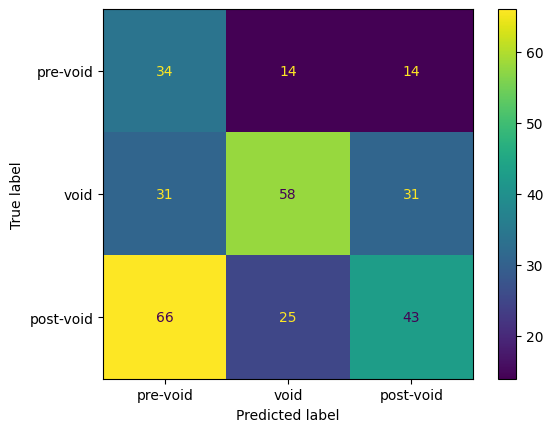

In [67]:

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
cm_display.plot()
# plt.title('3s sliding window, 0.5 overlap, smote')
# plt.savefig('model_plots/two_class_results/cm_3s_0.5_smote.png')
plt.show()


In [68]:
# # Retrieve the evaluation results
# results = model.evals_result()
# train_loss = results['validation_0']['mlogloss']
# test_loss = results['validation_1']['mlogloss']

# # Plot the loss function
# plt.figure(figsize=(10, 6))
# plt.plot(train_loss, label='Training Loss')
# plt.plot(test_loss, label='Validation Loss')
# plt.xlabel('Training Rounds')
# plt.ylabel('Log Loss')
# plt.title('3s sliding window, 0.5 overlap, smote')
# plt.legend()
# plt.grid(True)
# # plt.savefig('model_plots/two_class_results/loss_3s_0.5_smote.png')
# plt.show()

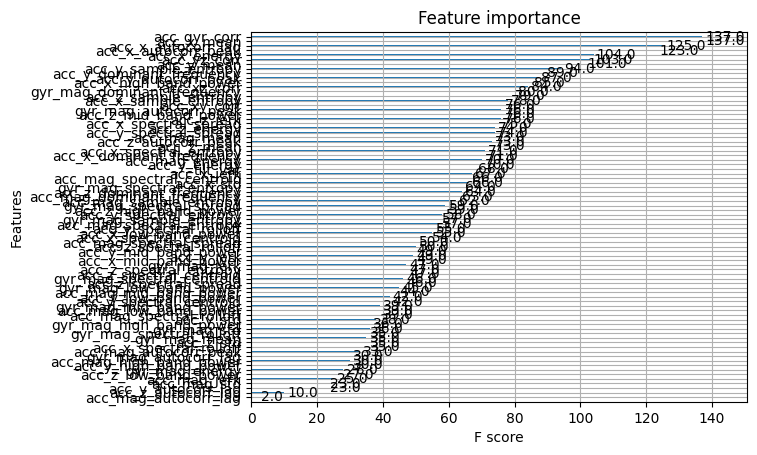

In [69]:
plot_importance(model)
plt.show()

In [70]:
# # Check class distribution after SMOTE
# unique, counts = np.unique(y_train_smote, return_counts=True)
# print(f"After SMOTE: {dict(zip(unique, counts))}")

# # Calculate new ratio (should be close to 1.0 if perfectly balanced)
# new_ratio = counts[0] / counts[1]  # negative/positive
# print(f"New scale_pos_weight should be: {new_ratio}")

In [71]:
# # Encode string labels to integers
# label_encoder = LabelEncoder()

# # use SMOTE data
# y_train_encoded = label_encoder.fit_transform(y_train_smote) # replaced y_train with the y_train_smote

# # y_train_encoded = label_encoder.fit_transform(y_train) 
# y_test_encoded = label_encoder.transform(y_test)



# # Now train XGBoost
# model = XGBClassifier(
#     n_estimators=200,
#     max_depth=5,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     eval_metric='logloss',
#     reg_alpha=0.1,   # L1 regularization
#     reg_lambda=1.0,  # L2 regularization
#     # early_stopping_rounds=10,
#     # scale_pos_weight=1.27,  # Adjust based on your imbalance
#     scale_pos_weight=new_ratio if abs(new_ratio - 1.0) > 0.1 else None,
#     verbosity=0
# )

# # eval_set = [(X_train, y_train_encoded), (X_test, y_test_encoded)] 
# # model.fit(X_train, y_train_encoded, eval_set=eval_set, verbose=False)  # Use encoded labels


# # use SMOTE data
# eval_set = [(X_train_smote, y_train_encoded), (X_test, y_test_encoded)] # replaced X_train with the X_train_smote
# model.fit(X_train_smote, y_train_encoded, eval_set=eval_set, verbose=False)  # Use encoded labels

In [72]:
from sklearn.metrics import (
        accuracy_score, precision_score, recall_score, f1_score,
        classification_report, confusion_matrix
    )
class_names = ["pre-void", "void", "post-void"]
precision_per_class = precision_score(y_test, y_pred, average=None, zero_division=0, labels=class_names)

In [73]:
precision_per_class

array([0.25954198, 0.59793814, 0.48863636])

In [ ]:
def calculate_metrics(y_true, y_pred):
    """
    Compute comprehensive classification metrics for 3-class classification.
    """
    # Class names for your specific use case
    class_names = ["pre-void", "void", "post-void"]
    
    # Overall metrics
    accuracy = accuracy_score(y_true, y_pred)
    
    # Per-class metrics
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0, labels=class_names)
    recall_per_class = recall_score(y_true, y_pred, average=None, zero_division=0, labels=class_names)
    f1_per_class = f1_score(y_true, y_pred, average=None, zero_division=0, labels=class_names)
    
    # Macro averages (unweighted mean of per-class metrics)
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    # Weighted averages (weighted by support - number of true instances for each label)
    precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    metrics = {
        'accuracy': accuracy,   
            
        'precision_pre-void': precision_per_class[0],
        'precision_void': precision_per_class[1],
        'precision_post-void': precision_per_class[2],
        
        'recall_pre-void': recall_per_class[0],
        'recall_void': recall_per_class[1],
        'recall_post-void': recall_per_class[2],
        
        'f1_pre-void': f1_per_class[0],
        'f1_void': f1_per_class[1],
        'f1_post-void': f1_per_class[2],
        
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        
        'precision_weighted': precision_weighted,
        'recall_weighted': recall_weighted,
        'f1_weighted': f1_weighted,
        
    }
    
    return metrics


# Example usage:
metrics = calculate_metrics(y_test, y_pred)
print(metrics)

{'accuracy': 0.4272151898734177, 'precision_pre-void': np.float64(0.2595419847328244), 'precision_void': np.float64(0.5979381443298969), 'precision_post-void': np.float64(0.48863636363636365), 'recall_pre-void': np.float64(0.5483870967741935), 'recall_void': np.float64(0.48333333333333334), 'recall_post-void': np.float64(0.3208955223880597), 'f1_pre-void': np.float64(0.35233160621761656), 'f1_void': np.float64(0.5345622119815668), 'f1_post-void': np.float64(0.38738738738738737), 'precision_macro': 0.44870549756636163, 'recall_macro': 0.4508719841651955, 'f1_macro': 0.4247604018621902, 'precision_weighted': 0.4851944718363781, 'recall_weighted': 0.4272151898734177, 'f1_weighted': 0.4363985282695891}
